# Cracking the Code: An Inside Look at Netflix's Content Strategy

## Project Goal
This project analyzes the Netflix content library to understand its strategic evolution. Instead of just a static overview, this analysis focuses on a key business question: **How has Netflix transformed from a digital library of licensed content into a global production powerhouse?**

We will explore this by analyzing trends over time, the shift in content types, and the company's global footprint.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

print("--- First 5 Rows ---")
print(df.head())

print("\n--- Data Info ---")
df.info()


--- First 5 Rows ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septe

### Data Cleaning and Preparation
Before diving into the analysis, the raw data needs to be cleaned and prepared. This involves two key steps:

1.  **Handling Missing Values:** Columns like `country` and `rating` have missing data. These will be filled with appropriate placeholders to ensure our analysis is accurate.
2.  **Processing Dates:** The `date_added` column is loaded as text. We will convert this into a proper date format so we can extract the year and month for our trend analysis.

In [2]:
# --- Handle Missing Values ---

# Fill missing values in key categorical columns with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# There are a few missing ratings; filled them with the most common rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Drop rows with missing 'date_added' as they are crucial for our time-series analysis
df.dropna(subset=['date_added'], inplace=True)


# --- Process the Dates ---

# Convert 'date_added' from a string to a datetime object
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Create new columns for the year and month content was added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


# --- Final Check ---

# Check the data types again to confirm our changes
print("--- Updated Data Info ---")
df.info()

# Display the first few rows to see our new 'year_added' and 'month_added' columns
print("\n--- DataFrame with New Date Columns ---")
print(df.head())

--- Updated Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int32         
 13  month_added   8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 

### Analysis 1: The Evolution of the Netflix Library

To understand Netflix's strategy, we first look at how their library has changed over time. The following charts reveal a clear and deliberate transformation.

**Key Insights:**

* **Explosive Growth:** The first chart shows that content addition exploded after 2015, marking a major strategic push into content acquisition and production.
* **The Shift to Series:** The second chart is crucial. It shows a dramatic increase in the number of TV Shows added, eventually overtaking Movies. This is clear evidence of their shift towards producing binge-worthy series to retain subscribers.
* **Targeting Mature Audiences:** The final chart shows that the proportion of mature content (like TV-MA) has significantly increased in recent years. This suggests a strategic move to capture the adult audience segment.

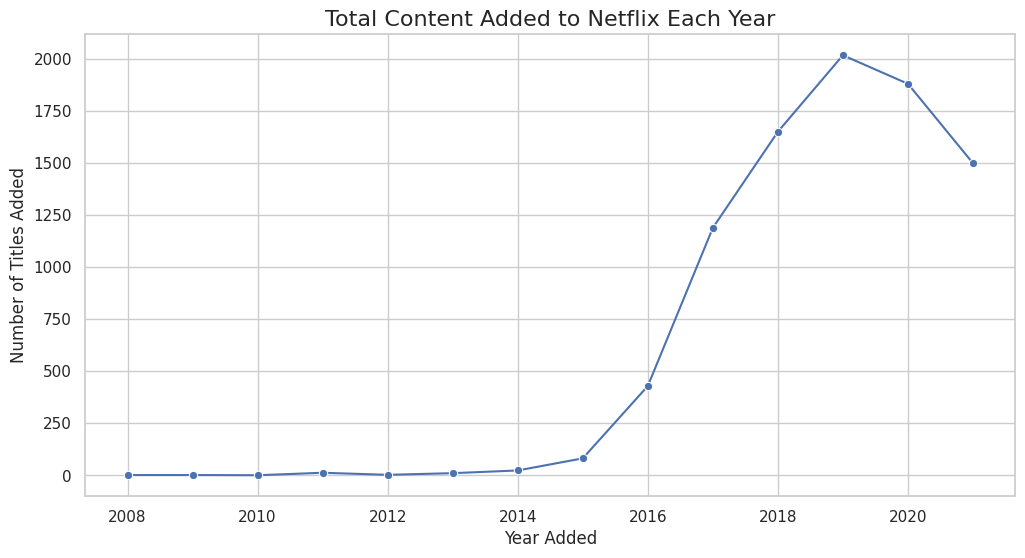

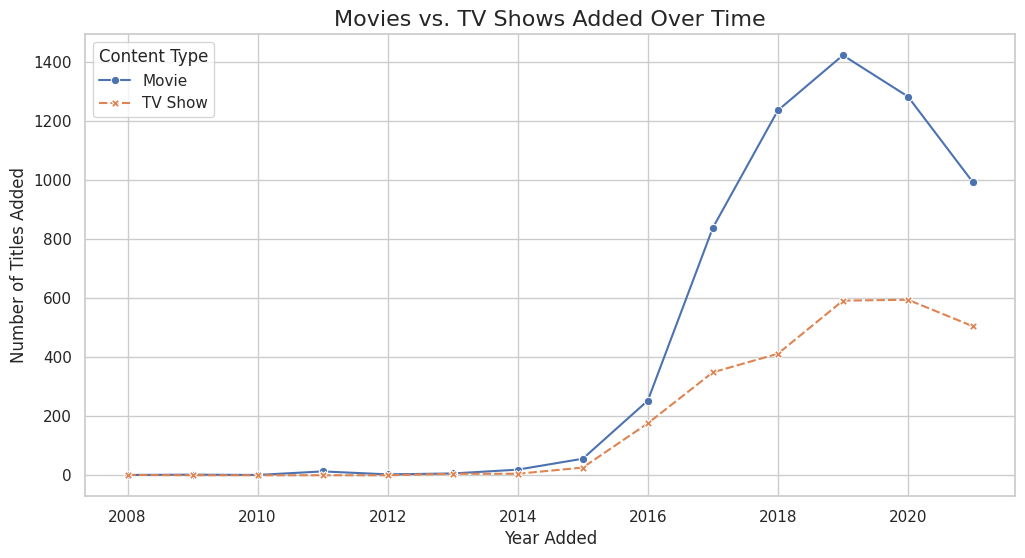

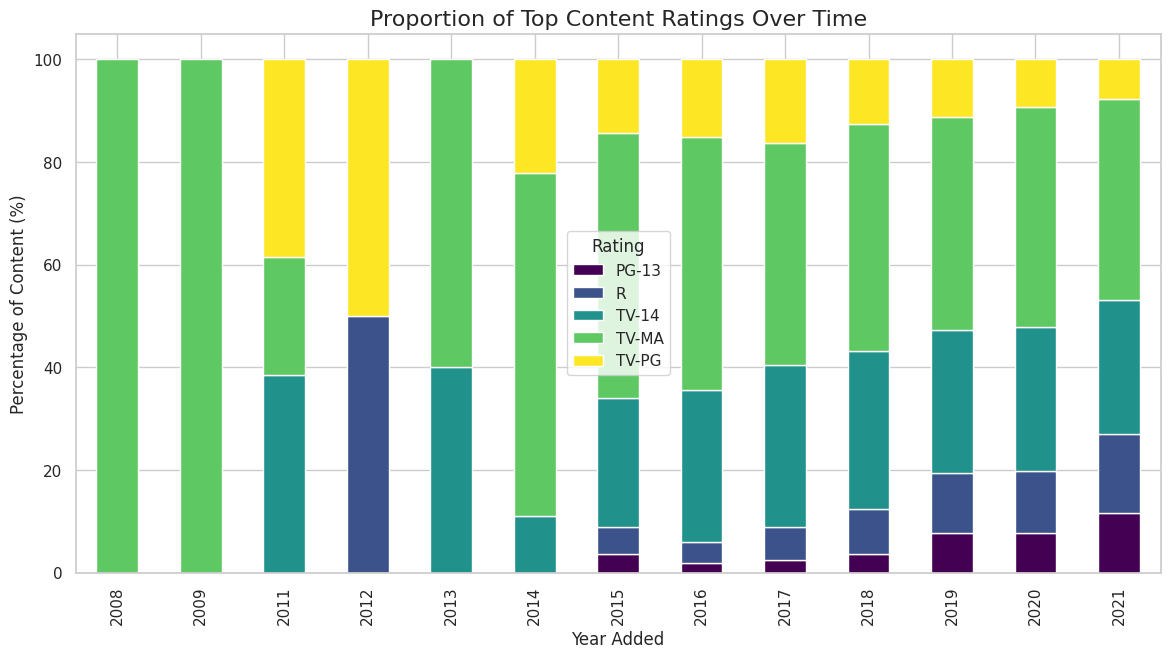

In [3]:
# Set the plot style for all our charts
sns.set(style="whitegrid")

# --- Plot 1: The Growth of Content on Netflix ---
plt.figure(figsize=(12, 6))
content_by_year = df['year_added'].value_counts().sort_index()
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title('Total Content Added to Netflix Each Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.show()

# --- Plot 2: Movies vs. TV Shows Over Time ---
plt.figure(figsize=(12, 6))
content_type_by_year = df.groupby('year_added')['type'].value_counts().unstack().fillna(0)
sns.lineplot(data=content_type_by_year, markers=True)
plt.title('Movies vs. TV Shows Added Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Content Type')
plt.show()

# --- Plot 3: The Evolution of Content Ratings ---
# We'll focus on the top 5 most common ratings
top_ratings = df['rating'].value_counts().nlargest(5).index
df_top_ratings = df[df['rating'].isin(top_ratings)]

# Create a crosstab to get counts of each rating per year
rating_by_year = pd.crosstab(df_top_ratings['year_added'], df_top_ratings['rating'])

# Create a 100% stacked bar chart to see the proportion change
rating_by_year.apply(lambda r: r/r.sum()*100, axis=1).plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='viridis'
)
plt.title('Proportion of Top Content Ratings Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Percentage of Content (%)', fontsize=12)
plt.legend(title='Rating')
plt.show()

### Analysis 2: Cracking the Global Code 🌎

A key part of Netflix's success is its global strategy. Here, we analyze which countries are major production hubs and how Netflix tailors its content for different markets.

**Key Insights:**

* **Global Production Hubs:** While the United States remains the top content producer, we see a massive investment in international markets. **India**, the **United Kingdom**, and **South Korea** have become major hubs, proving Netflix's commitment to producing local content.
* **A Tailored Genre Strategy:** The comparison between the US and India reveals a nuanced approach. While some genres are universally popular, Netflix clearly curates its library for local tastes, with a strong focus on **"Bollywood Movies"** in India, for example. This is a data-driven look at their market-specific strategy.


/tmp/ipython-input-3461694231.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_df['country'].replace('Unknown', np.nan, inplace=True) # Exclude 'Unknown' for this chart
/tmp/ipython-input-3461694231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


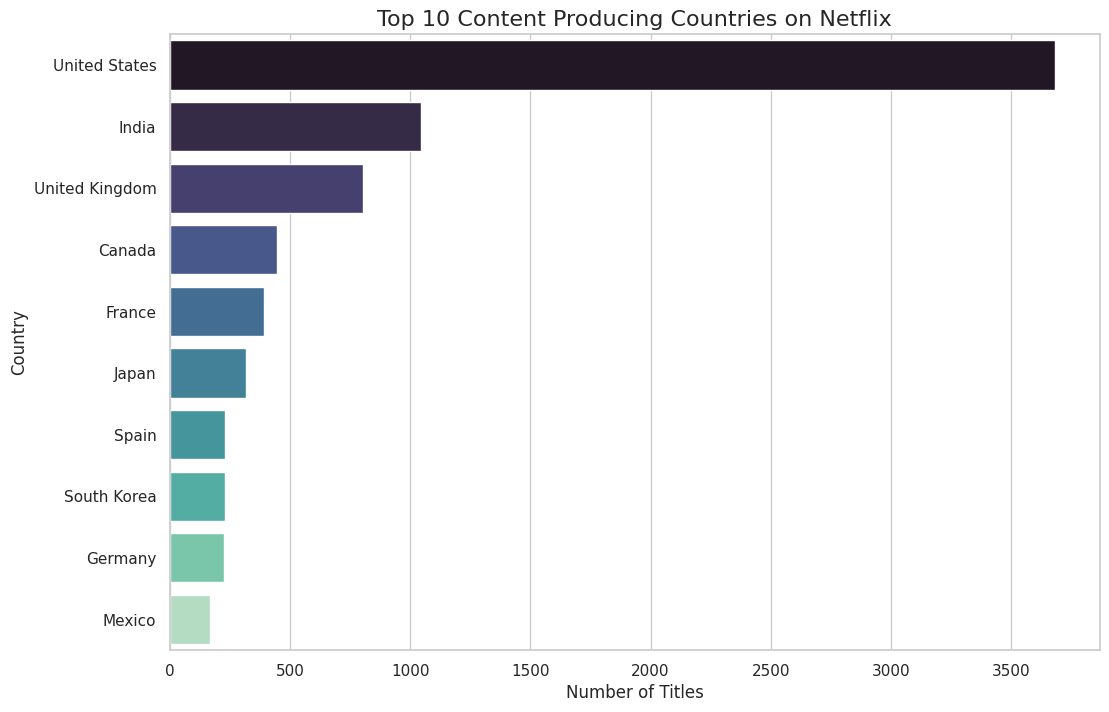

/tmp/ipython-input-3461694231.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=us_genres.index, x=us_genres.values, palette='viridis')
/tmp/ipython-input-3461694231.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y=india_genres.index, x=india_genres.values, palette='plasma')


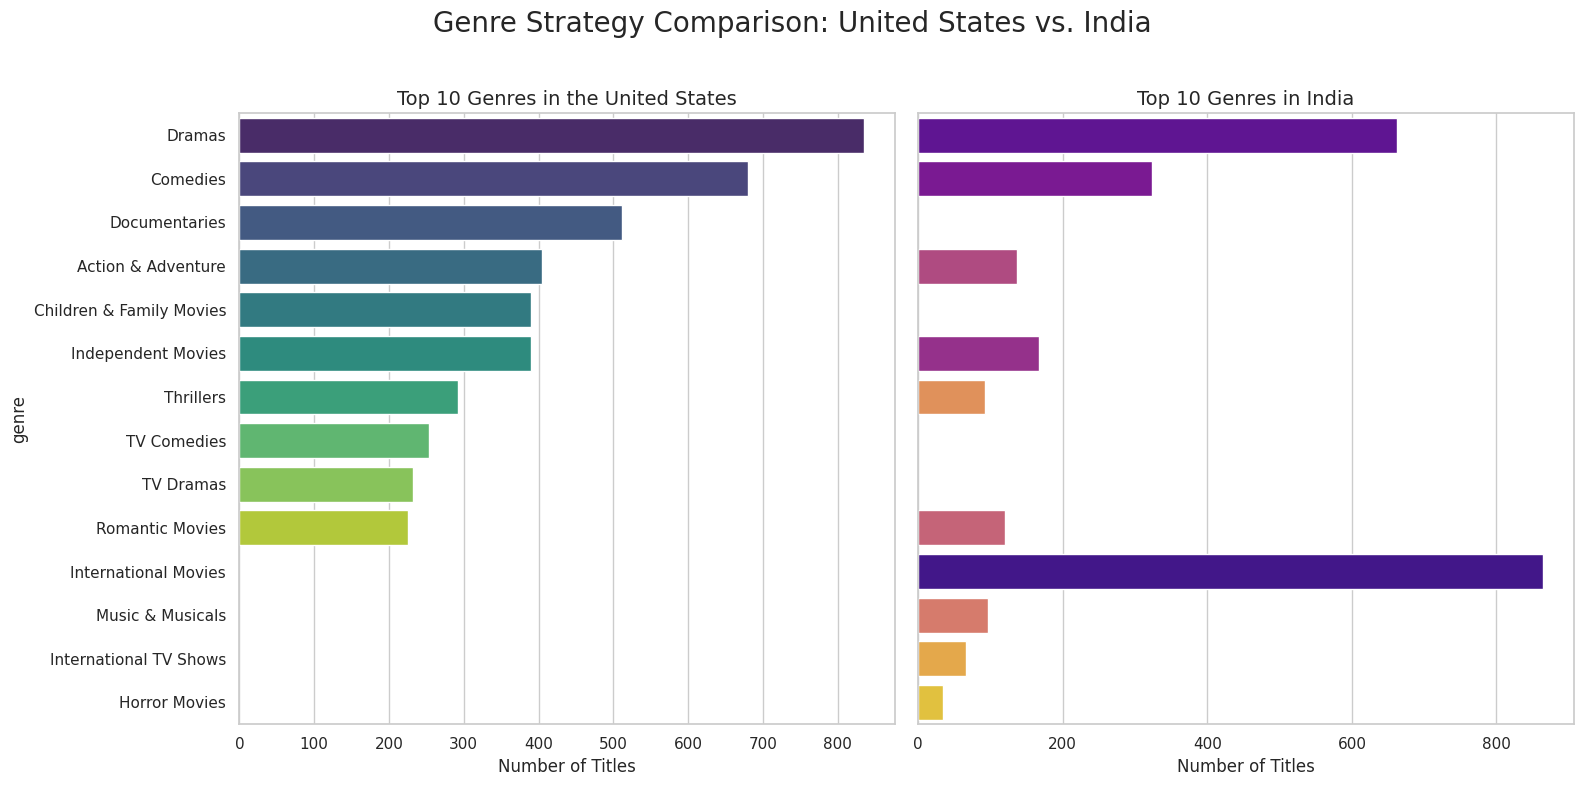

In [4]:
# Create a new dataframe with one country per row
country_df = df.copy()
country_df['country'] = country_df['country'].str.split(', ')
country_df = country_df.explode('country')
country_df['country'].replace('Unknown', np.nan, inplace=True) # Exclude 'Unknown' for this chart

# --- Plot 1: Top 10 Content Producing Countries ---
plt.figure(figsize=(12, 8))
top_countries = country_df['country'].value_counts().nlargest(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# --- Prep for Genre Analysis in Key Markets ---
# Clean and explode the 'listed_in' (genre) column
genre_df = country_df.copy()
genre_df['genre'] = genre_df['listed_in'].str.split(', ')
genre_df = genre_df.explode('genre')

# --- Plot 2: Genre Strategy Comparison (US vs. India) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.suptitle('Genre Strategy Comparison: United States vs. India', fontsize=20)

# Top genres in the United States
us_genres = genre_df[genre_df['country'] == 'United States']['genre'].value_counts().nlargest(10)
sns.barplot(ax=axes[0], y=us_genres.index, x=us_genres.values, palette='viridis')
axes[0].set_title('Top 10 Genres in the United States', fontsize=14)
axes[0].set_xlabel('Number of Titles', fontsize=12)

# Top genres in India
india_genres = genre_df[genre_df['country'] == 'India']['genre'].value_counts().nlargest(10)
sns.barplot(ax=axes[1], y=india_genres.index, x=india_genres.values, palette='plasma')
axes[1].set_title('Top 10 Genres in India', fontsize=14)
axes[1].set_xlabel('Number of Titles', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conclusion: From Library to Powerhouse

Our analysis confirms that Netflix's content strategy has undergone a massive transformation. The data tells a clear story:

Starting around 2015, Netflix pivoted aggressively from being a simple digital library to a full-fledged content creator. This was characterized by a **strategic shift towards producing TV Shows**, a focus on **more mature content**, and a massive **investment in global markets** with tailored content for local audiences, particularly in hubs like India.

By following this strategy, Netflix has successfully cracked the code, cementing its position as a global production powerhouse.
